# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [18]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import roc_auc_score, auc , roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD

from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from tqdm import tqdm_notebook as tqdm
import os
import pickle

<h1>1. DATA</h1>

In [2]:
data_projects = pd.read_csv('../Datasets/donor_choose_train_data.csv')
data_resources = pd.read_csv('../Datasets/donor_choose_resources.csv')

In [3]:
print("Shape of training dataset =",data_projects.shape)
print("Shape of resources dataset =",data_resources.shape)

Shape of training dataset = (109248, 17)
Shape of resources dataset = (1541272, 4)


In [4]:
print("Columns in train dataset = ",data_projects.columns)
print("*"*50)
print("Columns in resources dataset = ",data_resources.columns)


Columns in train dataset =  Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')
**************************************************
Columns in resources dataset =  Index(['id', 'description', 'quantity', 'price'], dtype='object')


<h2>1.1 Converting Date time format and sorting Data by Date</h2>

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(data_projects.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
data_projects['Date'] = pd.to_datetime(data_projects['project_submitted_datetime'])
data_projects.drop('project_submitted_datetime', axis=1, inplace=True)
data_projects.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
data_projects = data_projects[cols]


data_projects.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [6]:
output_value_counts = data_projects['project_is_approved'].value_counts()
output_value_counts

1    92706
0    16542
Name: project_is_approved, dtype: int64

<h1>2. PREPROCESSING</h1>

In [7]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [8]:
# https://gist.github.com/sebleier/554280

stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]


<h2>2.1 Project Categories</h2>

In [9]:
#print(list(data_projects['project_subject_categories'].values))

cats = list(data_projects['project_subject_categories'].values)
cg_list = []
category_list = []
for cg in cats:
    temp = ""
    for j in cg.split(","):
        if 'The' in j.split():
            j = j.replace('The','')
        j = j.replace(' ','')
        temp += j.strip()+' '
        temp = temp.replace('&','_')
    cg_list.append(temp)
for i in cg_list:
     i = i.strip()
     category_list.append(i)
# print(category_list)



data_projects["clean_categories"] = category_list
data_projects.drop(["project_subject_categories"], axis = 1, inplace = True)
# print(data_projects.head(2))

#preprocessing
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_coll = Counter()
for x in data_projects['clean_categories'].values:
    my_coll.update(x.split())
    
my_coll = dict(my_coll)
print(my_coll)
sorted_coll_dict = dict(sorted(my_coll.items(), key=lambda x: x[1]))
print((sorted_coll_dict))

{'Math_Science': 41421, 'SpecialNeeds': 13642, 'Literacy_Language': 52239, 'AppliedLearning': 12135, 'History_Civics': 5914, 'Music_Arts': 10293, 'Health_Sports': 14223, 'Warmth': 1388, 'Care_Hunger': 1388}
{'Warmth': 1388, 'Care_Hunger': 1388, 'History_Civics': 5914, 'Music_Arts': 10293, 'AppliedLearning': 12135, 'SpecialNeeds': 13642, 'Health_Sports': 14223, 'Math_Science': 41421, 'Literacy_Language': 52239}


<h2>2.2 Project Subcategories</h2>

In [10]:
cats = list(data_projects['project_subject_subcategories'].values)
cg_list = []
category_list = []
for cg in cats:
    temp = ""
    for j in cg.split(","):
        if 'The' in j.split():
            j = j.replace('The','')
        j = j.replace(' ','')
        temp += j.strip()+' '
        temp = temp.replace('&','_')
    cg_list.append(temp)
for i in cg_list:
     i = i.strip()
     category_list.append(i)
# print(category_list)    

data_projects["clean_sub_categories"] = category_list
data_projects.drop(["project_subject_subcategories"], axis = 1, inplace = True)
# print(data_projects.head(2))


from collections import Counter
my_coll_sub = Counter()
for x in data_projects['clean_sub_categories'].values:
    my_coll_sub.update(x.split())
    
my_coll_sub = dict(my_coll_sub)
sorted_coll_dict_sub = dict(sorted(my_coll_sub.items(), key=lambda x: x[1]))
print(sorted_coll_dict_sub)


{'Economics': 269, 'CommunityService': 441, 'FinancialLiteracy': 568, 'ParentInvolvement': 677, 'Extracurricular': 810, 'Civics_Government': 815, 'ForeignLanguages': 890, 'NutritionEducation': 1355, 'Warmth': 1388, 'Care_Hunger': 1388, 'SocialSciences': 1920, 'PerformingArts': 1961, 'CharacterEducation': 2065, 'TeamSports': 2192, 'Other': 2372, 'College_CareerPrep': 2568, 'Music': 3145, 'History_Geography': 3171, 'Health_LifeScience': 4235, 'EarlyDevelopment': 4254, 'ESL': 4367, 'Gym_Fitness': 4509, 'EnvironmentalScience': 5591, 'VisualArts': 6278, 'Health_Wellness': 10234, 'AppliedSciences': 10816, 'SpecialNeeds': 13642, 'Literature_Writing': 22179, 'Mathematics': 28074, 'Literacy': 33700}


<h2> 2.3 Project Essay </h2>


In [11]:
data_projects['essay'] = data_projects['project_essay_1'].map(str) \
                 + data_projects['project_essay_2'].map(str) \
                 + data_projects['project_essay_3'].map(str) \
                 + data_projects['project_essay_4'].map(str)

In [12]:
from tqdm import tqdm
preprocessed_essay = []

for item in tqdm(data_projects['essay'].values):
        it = decontracted(item)
        it = it.replace('\\r', ' ')
        it = it.replace('\\"', ' ')
        it = it.replace('\\n', ' ')
        it = re.sub('[^A-Za-z0-9]+', ' ',it)
        it = ' '.join(e for e in it.split() if e not in stopwords)
        preprocessed_essay.append(it.lower().strip())
        
preprocessed_essay[1000]
data_projects['preprocessed_essays'] = preprocessed_essay

100%|████████████████████████████████| 109248/109248 [01:47<00:00, 1012.74it/s]


<h2> 2.4 PROJECT TITLE</h2>

In [13]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(data_projects['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())
data_projects['preprocessed_titles'] = preprocessed_titles

100%|███████████████████████████████| 109248/109248 [00:05<00:00, 19868.30it/s]


<h2> 2.5. PROJECT GRADE</h2>

In [14]:
data_projects['project_grade_category'].value_counts()

Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

In [15]:
data_projects['project_grade_category'] = data_projects['project_grade_category'].str.replace(" ", "_")
data_projects['project_grade_category'].value_counts()

Grades_PreK-2    44225
Grades_3-5       37137
Grades_6-8       16923
Grades_9-12      10963
Name: project_grade_category, dtype: int64

<h2> 2.6. TEACHER PREFIX PREPROCESSING </h2>

In [16]:
data_projects['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [17]:
data_projects['teacher_prefix'] = data_projects['teacher_prefix'].str.replace(".", "")
data_projects['teacher_prefix'].value_counts()

Mrs        57269
Ms         38955
Mr         10648
Teacher     2360
Dr            13
Name: teacher_prefix, dtype: int64

<h2><font color='red'> $2.7$ Adding auxiliary derived features </font></h2>
<h3><font color='blue'> $2.7.1$ Sentiment Score </font></h3>

In [18]:
#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment_id = SentimentIntensityAnalyzer()
essay = data_projects['essay']
essay_sentiments = []

for e in tqdm(essay):
    scores = sentiment_id.polarity_scores(e)
    essay_sentiments.append(scores['compound']) #Considering compound as a criteria.

data_projects['essay_sentiment'] = essay_sentiments

100%|█████████████████████████████████| 109248/109248 [08:19<00:00, 218.85it/s]


<h3><font color='blue'> $2.7.1$ number of words of project titles and essays </font></h3>

In [19]:
for col, new_col in [('project_title', 'title_size'), ('essay', 'essay_size')]:
    data_col = data_projects[col]
    col_size = []
    for i in data_col:
        i = decontracted(i)
        col_size.append(len(i.split()))
    data_projects[new_col] = col_size

In [11]:
if not os.path.isfile('final_data_features.csv'):
      data_projects.to_csv("final_data_features.csv", index=False)
else:
    data_projects = pd.read_csv("final_data_features.csv")
    print("continue...")

continue...


In [12]:
data_projects.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,...,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_sub_categories,essay,preprocessed_essays,preprocessed_titles,essay_sentiment,title_size,essay_size
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs,CA,2016-04-27 00:27:36,Grades_PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...,i fortunate enough use fairy tale stem kits cl...,engineering steam primary classroom,0.9885,6,288
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms,UT,2016-04-27 00:31:25,Grades_3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...,imagine 8 9 years old you third grade classroo...,sensory tools focus,0.9950,4,349
2,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs,CA,2016-04-27 00:46:53,Grades_PreK-2,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,...,10,1,Literacy_Language,Literacy,Having a class of 24 students comes with diver...,having class 24 students comes diverse learner...,mobile learning mobile listening center,0.9866,7,177
3,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs,GA,2016-04-27 00:53:00,Grades_PreK-2,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,...,2,1,AppliedLearning,EarlyDevelopment,I recently read an article about giving studen...,i recently read article giving students choice...,flexible seating flexible learning,0.9595,5,225
4,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs,WA,2016-04-27 01:05:25,Grades_3-5,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",...,2,1,Literacy_Language,Literacy,"My students crave challenge, they eat obstacle...",my students crave challenge eat obstacles brea...,going deep the art inner thinking,0.9885,7,185


In [13]:
data_projects = data_projects.iloc[:50000,:]
data_projects.shape

(50000, 23)

<h1> 3. Preparing Data for Models </h1>


In [14]:
y = data_projects['project_is_approved'].values
data_projects.drop(['project_is_approved'], axis = 1, inplace = True)
X = data_projects

In [15]:
X.head(1)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_sub_categories,essay,preprocessed_essays,preprocessed_titles,essay_sentiment,title_size,essay_size
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs,CA,2016-04-27 00:27:36,Grades_PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,...,My students need STEM kits to learn critical s...,53,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...,i fortunate enough use fairy tale stem kits cl...,engineering steam primary classroom,0.9885,6,288


<h2><b> $3.1$ Splitting data into Train and test set</b></h2>

In [16]:
#Since we perform hyper-parameter tuning using gridSearchCV, we need only train set and test set as cross validation set
#is formed while performing gridSearchCV(python sklearn implementation)
# default cv = 5 which performs 5 fold cross validatiion for sklearns's gridSearchcv
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

In [17]:
print("Shape  of Train dataset :",X_train.shape)
print("***"*10)
print("Shape  of Test dataset :",X_test.shape)

Shape  of Train dataset : (40000, 22)
******************************
Shape  of Test dataset : (10000, 22)


<h2> $3.2$ One Hot Encoding of categorical features: </h2>


In [18]:
data_projects.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_sub_categories', 'essay', 'preprocessed_essays',
       'preprocessed_titles', 'essay_sentiment', 'title_size', 'essay_size'],
      dtype='object')

<h3> 3.2.2. clean_categories: </h3>

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(vocabulary=list(sorted_coll_dict.keys()), lowercase=False, binary=True)
vec.fit(X_train['clean_categories'].values)

cat_one_hot_train = vec.transform(X_train['clean_categories'].values)
cat_one_hot_test = vec.transform(X_test['clean_categories'].values)

print(cat_one_hot_train.shape)
print(cat_one_hot_test.shape)
print(vec.get_feature_names())


(40000, 9)
(10000, 9)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


<h3> 3.2.3 clean_sub_categories:</h3>

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(vocabulary=list(sorted_coll_dict_sub.keys()),lowercase=False, binary=True)
vec.fit(X_train['clean_categories'].values)

sub_cat_one_hot_train = vec.transform(X_train['clean_categories'].values)
sub_cat_one_hot_test = vec.transform(X_test['clean_categories'].values)

print(sub_cat_one_hot_train.shape)
print(sub_cat_one_hot_test.shape)
print(vec.get_feature_names())


(40000, 30)
(10000, 30)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


<h3> 3.2.4. school_state </h3>

In [21]:
state = Counter()
for st in data_projects['school_state'].values:
    state.update(st.split())
dict_state = dict(state)
sorted_state_dict = dict(sorted(state.items(), key=lambda x: x[1]))

In [22]:
vec = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
vec.fit(X_train['school_state'].values)

school_state_one_hot_train = vec.transform(X_train['school_state'].values)
school_state_one_hot_test = vec.transform(X_test['school_state'].values)

print("Shape of Train data - one hot encoding",school_state_one_hot_train.shape)
print("Shape of Test data - one hot encoding",school_state_one_hot_test.shape)
print(vec.get_feature_names())

Shape of Train data - one hot encoding (40000, 51)
Shape of Test data - one hot encoding (10000, 51)
['WY', 'VT', 'ND', 'MT', 'RI', 'SD', 'NH', 'NE', 'AK', 'DE', 'HI', 'ME', 'NM', 'DC', 'WV', 'KS', 'ID', 'IA', 'CO', 'MN', 'AR', 'KY', 'MS', 'NV', 'OR', 'CT', 'AL', 'MD', 'NJ', 'WI', 'TN', 'VA', 'UT', 'AZ', 'WA', 'MA', 'OK', 'OH', 'LA', 'IN', 'MO', 'MI', 'PA', 'SC', 'IL', 'GA', 'NC', 'NY', 'FL', 'TX', 'CA']


<h3> 3.2.5. PROJECT GRADE CATEGORIES: </h3>

In [23]:
grade = Counter()
for gd in data_projects['project_grade_category'].values:
    grade.update(gd.split())
dict_grade = dict(grade)
sorted_grade_dict = dict(sorted(dict_grade.items(), key=lambda x: x[1]))

In [24]:
vec = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vec.fit(X_train['project_grade_category'].values)

grade_one_hot_train = vec.transform(X_train['school_state'].values)
grade_one_hot_test = vec.transform(X_test['school_state'].values)

print("Shape of Train data - one hot encoding",grade_one_hot_train.shape)
print("Shape of Test data - one hot encoding",grade_one_hot_test.shape)

print(vec.get_feature_names())

Shape of Train data - one hot encoding (40000, 4)
Shape of Test data - one hot encoding (10000, 4)
['Grades_9-12', 'Grades_6-8', 'Grades_3-5', 'Grades_PreK-2']


<h3> 3.2.6. teacher_prefix </h3>

In [25]:
prefix = Counter()
for tp in data_projects['teacher_prefix'].values:
    tp = str(tp)
    prefix.update(tp.split())

dict_prefix = dict(prefix)
sorted_teacher_prefix_dict = dict(sorted(dict_prefix.items(), key=lambda x: x[1]))

In [26]:
vec = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
vec.fit(X_train['teacher_prefix'].values.astype("U"))

teacher_prefix_one_hot_train = vec.transform(X_train['teacher_prefix'].values.astype("U"))
teacher_prefix_one_hot_test = vec.transform(X_test['teacher_prefix'].values.astype("U"))

print("Shape of Train data - one hot encoding",teacher_prefix_one_hot_train.shape)
print("Shape of Test data - one hot encoding ",teacher_prefix_one_hot_test.shape)

print(vec.get_feature_names())

Shape of Train data - one hot encoding (40000, 6)
Shape of Test data - one hot encoding  (10000, 6)
['nan', 'Dr', 'Teacher', 'Mr', 'Ms', 'Mrs']


In [13]:
print(co_occur_matrix)

[[3. 2. 2.]
 [2. 4. 1.]
 [3. 2. 2.]]


In [27]:
essay_title_list = (list(X_train['preprocessed_essays'])+list(X_test['preprocessed_titles']))

tfidf_vect = TfidfVectorizer()
tfidf_vect.fit_transform(essay_title_list)

idf_score = tfidf_vect.idf_
feature_names  = tfidf_vect.get_feature_names() 

idf_score_features = []
for i in range(len(idf_score)):
    idf_score_features.append([idf_score[i],feature_names[i]])

In [28]:
idf_score_features.sort(key = lambda x: x[0] , reverse=True)
idf_score_features = idf_score_features[:2000]

In [29]:
#Co-occurence matrix
co_occur_matrix = np.zeros((2000,2000))
window_size = 5

final_features_2000 = []
for i in range(2000):
    final_features_2000.append(idf_score_features[i][1])

In [30]:
for x in essay_title_list:
    words = x.split()
    for id,word in enumerate(words):
        if word in final_features_2000:
            for i in range(max(0,id - window_size),min(id + window_size,len(words))):
                if words[i] in final_features_2000:
                    co_occur_matrix[final_features_2000.index(words[i]),final_features_2000.index(word)]+=1

In [31]:
co_occur_matrix.shape

(2000, 2000)

In [32]:
with open('co_occur_matrix.pkl','wb') as f:
    pickle.dump(co_occur_matrix, f)

In [33]:
co_occur_matrix = np.array(co_occur_matrix)

In [34]:
# finding optimal value of n_componenets(n) using truncated svd
from sklearn.decomposition import TruncatedSVD

n_components = [10,30,50,100,200,300,400,500,1000,1200,1500,1600,1700,1800,1900,1999]
explained_variance = []
for x in n_components:
    svd=TruncatedSVD(n_components = x,random_state=42)
    svd.fit(co_occur_matrix)
    exp_var = svd.explained_variance_ratio_.sum()
    explained_variance.append(exp_var) 
    print('n_components=',x,'variance=',exp_var) 

n_components= 10 variance= 0.08402300893771256
n_components= 30 variance= 0.1769713732202846
n_components= 50 variance= 0.23078361443656797
n_components= 100 variance= 0.30061861057286315
n_components= 200 variance= 0.38889887978436805
n_components= 300 variance= 0.42376121395508265
n_components= 400 variance= 0.45862068499789727
n_components= 500 variance= 0.49347061226174116
n_components= 1000 variance= 0.6677560508192523
n_components= 1200 variance= 0.737459836083392
n_components= 1500 variance= 0.842047692510348
n_components= 1600 variance= 0.8768986180468028
n_components= 1700 variance= 0.9117535029013584
n_components= 1800 variance= 0.9466201107747396
n_components= 1900 variance= 0.9814696892183729
n_components= 1999 variance= 0.9999999999999817


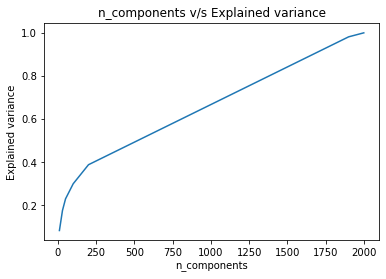

In [35]:
#plotting curve between n_components and explained variance
plt.plot(n_components, explained_variance)
plt.xlabel('n_components')
plt.ylabel("Explained variance")
plt.title("n_components v/s Explained variance")
plt.show()

In [36]:
# we take n_components = 1800 as it explains about 95% of variance in the matrix
from sklearn.decomposition import TruncatedSVD

t_svd = TruncatedSVD(n_components=1800,random_state=42)
final_co_occur_matrix = t_svd.fit_transform(co_occur_matrix)
final_co_occur_matrix.shape

(2000, 1800)

In [37]:
dict_word_vect = {}
for i in range(len(final_features_2000)):
    dict_word_vect[final_features_2000[i]] = final_co_occur_matrix[i]

In [38]:
# model = final_2000_features
glove_words =  set(dict_word_vect.keys())

In [39]:
# average Word2Vec
# compute average word2vec for each review.
essays_train_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_train['preprocessed_essays']: # for each review/sentence
    vector = np.zeros(1800) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += dict_word_vect[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    essays_train_avg_w2v.append(vector)

In [40]:
# average Word2Vec
# compute average word2vec for each review.
titles_train_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_train['preprocessed_titles']: # for each review/sentence
    vector = np.zeros(1800) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += dict_word_vect[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    titles_train_avg_w2v.append(vector)

In [41]:
len(titles_train_avg_w2v)

40000

In [42]:
# average Word2Vec
# compute average word2vec for each review.
titles_test_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_test['preprocessed_titles']: # for each review/sentence
    vector = np.zeros(1800) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += dict_word_vect[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    titles_test_avg_w2v.append(vector)

In [43]:
# average Word2Vec
# compute average word2vec for each review.
essays_test_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_test['preprocessed_essays']: # for each review/sentence
    vector = np.zeros(1800) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += dict_word_vect[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    essays_test_avg_w2v.append(vector)

<h2> $3.7.$ Vectorizing Numerical Data </h2>
PRICE , QUANTITY , Number of Projects Proposed Previously by the Teacher

<h3> 3.7.1 Price </h3>

In [44]:
price_data = data_resources.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(3)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21
2,p000003,298.97,4


In [45]:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')

In [46]:
from sklearn.preprocessing import StandardScaler
price_numerical = StandardScaler()
price_numerical.fit(X_train['price'].values.reshape(-1,1))

standardized_price_train = price_numerical.transform(X_train['price'].values.reshape(-1,1))
standardized_price_test = price_numerical.transform(X_test['price'].values.reshape(-1,1))

print(standardized_price_train.shape,"and",y_train.shape)
print(standardized_price_test.shape,"and",y_test.shape)

(40000, 1) and (40000,)
(10000, 1) and (10000,)


<h3> 3.7.2 Quantity </h3>

In [47]:
quantity_numerical = StandardScaler()
quantity_numerical.fit(X_train['quantity'].values.reshape(-1,1)) 

standardized_quantity_train = quantity_numerical.transform(X_train['quantity'].values.reshape(-1,1))
standardized_quantity_test = quantity_numerical.transform(X_test['quantity'].values.reshape(-1,1))

print(standardized_quantity_train.shape,"and",y_train.shape)
print(standardized_quantity_test.shape,"and",y_test.shape)

(40000, 1) and (40000,)
(10000, 1) and (10000,)


<h3> 3.7.3 Number of previously posted projects by teachers </h3>

In [48]:
teacher_no_previous_project_numerical = StandardScaler()
teacher_no_previous_project_numerical.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 

standardized_teacher_no_train = teacher_no_previous_project_numerical.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
standardized_teacher_no_test = teacher_no_previous_project_numerical.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(standardized_teacher_no_train.shape,"and",y_train.shape)
print(standardized_teacher_no_test.shape,"and",y_test.shape)

(40000, 1) and (40000,)
(10000, 1) and (10000,)


<h3> <font color='blue'>$3.7.4$ Sentiment Scores of essay text</h3>

In [49]:
scale = StandardScaler()
scale.fit(X_train['essay_sentiment'].values.reshape(-1,1)) 

standardized_sentiment_train = scale.transform(X_train['essay_sentiment'].values.reshape(-1,1))
standardized_sentiment_test = scale.transform(X_test['essay_sentiment'].values.reshape(-1,1))

print(standardized_sentiment_train.shape,"and",y_train.shape)
print(standardized_sentiment_test.shape,"and",y_test.shape)

(40000, 1) and (40000,)
(10000, 1) and (10000,)


<h3> <font color='blue'>$3.7.5$ Project Essay Length</h3>

In [50]:
scale = StandardScaler()
scale.fit(X_train['essay_size'].values.reshape(-1,1)) 

standardized_essay_size_train = scale.transform(X_train['essay_size'].values.reshape(-1,1))
standardized_essay_size_test = scale.transform(X_test['essay_size'].values.reshape(-1,1))

print(standardized_essay_size_train.shape,"and",y_train.shape)
print(standardized_essay_size_test.shape,"and",y_test.shape)

(40000, 1) and (40000,)
(10000, 1) and (10000,)


<h3> <font color='blue'>$3.7.6$ Project Title Length</h3>

In [51]:
scale = StandardScaler()
scale.fit(X_train['title_size'].values.reshape(-1,1)) 

standardized_title_size_train = scale.transform(X_train['title_size'].values.reshape(-1,1))
standardized_title_size_test = scale.transform(X_test['title_size'].values.reshape(-1,1))

print(standardized_title_size_train.shape,"and",y_train.shape)
print(standardized_title_size_test.shape,"and",y_test.shape)

(40000, 1) and (40000,)
(10000, 1) and (10000,)


# Assignment 11: TruncatedSVD

- <font color='red'>step 1</font> Select the top 2k words from essay text and project_title (concatinate essay text with project title and then find the top 2k words) based on their <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>`idf_`</a> values 
- <font color='red'>step 2</font> Compute the co-occurance matrix with these 2k words, with window size=5 (<a href='https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/'>ref</a>)
    <img src='cooc.JPG' width=300px>
- <font color='red'>step 3</font> Use <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on calculated co-occurance matrix and reduce its dimensions, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a>
 >- The shape of the matrix after TruncatedSVD will be 2000\*n, i.e. each row represents a vector form of the corresponding word. <br>
 >- Vectorize the essay text and project titles using these word vectors. (while vectorizing, do ignore all the words which are not in top 2k words)
- <font color='red'>step 4</font> Concatenate these truncatedSVD matrix, with the matrix with features
<ul>
    <li><strong>school_state</strong> : categorical data</li>
    <li><strong>clean_categories</strong> : categorical data</li>
    <li><strong>clean_subcategories</strong> : categorical data</li>
    <li><strong>project_grade_category</strong> :categorical data</li>
    <li><strong>teacher_prefix</strong> : categorical data</li>
    <li><strong>quantity</strong> : numerical data</li>
    <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
    <li><strong>price</strong> : numerical data</li>
    <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
    <li><strong>number of words in the title</strong> : numerical data</li>
    <li><strong>number of words in the combine essays</strong> : numerical data</li>
    <li><strong>word vectors calculated in</strong> <font color='red'>step 3</font> : numerical data</li>
</ul>
- <font color='red'>step 5</font>: Apply GBDT on matrix that was formed in <font color='red'>step 4</font> of this assignment, <font color='blue'><strong>DO REFER THIS BLOG: <a href='https://www.kdnuggets.com/2017/03/simple-xgboost-tutorial-iris-dataset.html'>XGBOOST DMATRIX<strong></a></font>
<li><font color='red'>step 6</font>:Hyper parameter tuning (Consider any two hyper parameters)<ul><li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>



In [52]:
#Functions required for all further tasks.
#REFERENCES:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://datascience.stackexchange.com/questions/22762/understanding-predict-proba-from-multioutputclassifier/22821#22821
#Xgboost: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
#CONFUSION MATRIX: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/48018785
#ROC: https://www.codespeedy.com/how-to-plot-roc-curve-using-sklearn-library-in-python/
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
import xgboost as xgb

def prob_scores(clf,data):
    y_pred = []
    loop = data.shape[0] - data.shape[0]%1000
    for i in range(0,loop,1000):
        y_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    y_pred.extend(clf.predict_proba(data[loop:])[:,1])
    return y_pred

def getAUC(X, y):
    auc_train = []
    auc_cv = []
    parameters = [{'n_estimators': [50,100,200,300,450] , 'max_depth': [10,20,50,100]}]
    #https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
    gbdt = xgb.XGBClassifier(n_jobs=-1,class_weight='balanced')
    clf = GridSearchCV(gbdt, parameters, cv=3, scoring='roc_auc',return_train_score=True)
    clf.fit(X, y)
    return clf 

def plotPerformance(clf):
    sns.set()
    max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', \
                                                                                                                    'mean_train_score']]
    fig, ax = plt.subplots(1,2, figsize=(20,6))
    sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
    sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
    ax[0].set_title('Train Set')
    ax[1].set_title('CV Set')
    plt.show()
    

def train_using_optimal_hyperparameter(clf, X_train):
    print("Optimal Estimator", clf.best_estimator_)
    gbdt = clf.best_estimator_
    gbdt.fit(X_train, y_train)
    return gbdt

def get_plot_ROC_confusion_matrix(clf, X_tr , X_te ):
    y_train_pred1 = prob_scores(clf , X_tr)
    y_test_pred1 =  prob_scores(clf , X_te)
    train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
    test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
    plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
    plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ERROR PLOTS")
    plt.grid(True)
    plt.show()
    
    
    sns.set()
    conf_train = confusion_matrix(y_train, predicted_Values(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
    conf_test = confusion_matrix(y_test, predicted_Values(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))
    key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), conf_train.flatten())])).reshape(2,2)
    labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),conf_test.flatten())])).reshape(2,2)
    sns.heatmap(conf_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],\
                yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
    sns.heatmap(conf_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],\
                yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
    ax[0].set_title('Train Set')
    ax[1].set_title('Test Set')
    plt.show()


def predicted_Values( prob_values, thresholds , tpr , fpr):
    threshold_optimal = thresholds[np.argmax(tpr*(1-fpr))] 
    # threshold for max value of tpr*(1-fpr)
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("Maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for optimal threshold", threshold_optimal)
    predicted_value_list = []
    for item in prob_values:
        if item >= threshold_optimal:
            predicted_value_list.append(1)# we are assigning a class value of 1 if the probability score given by  classifier  
            #is greater than the optimal threshold else 0.
        else:
            predicted_value_list.append(0)
    return predicted_value_list


<span>Set 1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</span>

* ### $2.4.1$ Applying Support Vector Machine(SVM) on BOW<font color='yellow'> SET $1$</font>

In [53]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merged = hstack((cat_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, grade_one_hot_train, \
                         teacher_prefix_one_hot_train, standardized_price_train, standardized_quantity_train, \
                         standardized_teacher_no_train,standardized_sentiment_train,standardized_essay_size_train,\
                         standardized_title_size_train,titles_train_avg_w2v, essays_train_avg_w2v)).tocsr()
X_test_merged = hstack((cat_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, grade_one_hot_test, \
                        teacher_prefix_one_hot_test, standardized_price_test, standardized_quantity_test, standardized_teacher_no_test,\
                        standardized_sentiment_test,standardized_essay_size_test,standardized_title_size_test,titles_test_avg_w2v,\
                        essays_test_avg_w2v)).tocsr()


print("FINAL DATA MATRIX FOR BOW")
print(X_train_merged.shape, y_train.shape)
print(X_test_merged.shape, y_test.shape)

FINAL DATA MATRIX FOR BOW
(40000, 3706) (40000,)
(10000, 3706) (10000,)


$l1$ regulization

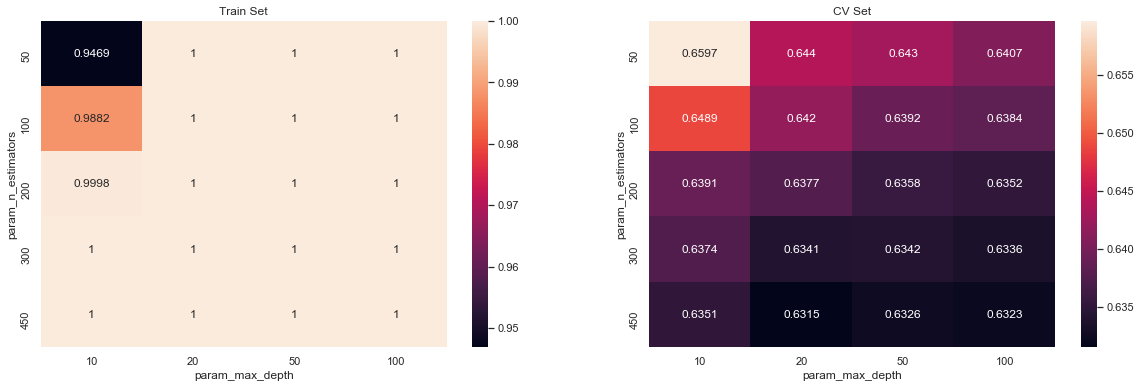

Optimal Estimator XGBClassifier(base_score=0.5, booster=None, class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)


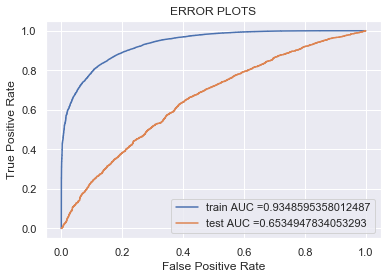

Maximum value of tpr*(1-fpr) 0.02292996491445637 for optimal threshold 0.7976943
Maximum value of tpr*(1-fpr) 0.15257906361209086 for optimal threshold 0.8834285


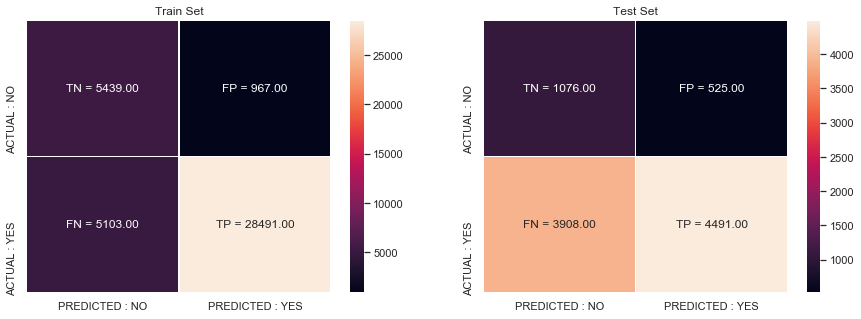

In [55]:
title1 = 'Avg W2V'

grid_clf = getAUC(X_train_merged, y_train)
plotPerformance(grid_clf)
gbdt_opt = train_using_optimal_hyperparameter(grid_clf,X_train_merged)
get_plot_ROC_confusion_matrix(gbdt_opt, X_train_merged , X_test_merged)

$Observations and Conclusions$

In [1]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "Train AUC","Test AUC"]
x.add_row(["AVG W2V", "XGBoost", "Max Depth:10 , n_estimators:50",0.935 ,0.653])
print(x)

+------------+---------+--------------------------------+-----------+----------+
| Vectorizer |  Model  |        Hyper Parameter         | Train AUC | Test AUC |
+------------+---------+--------------------------------+-----------+----------+
|  AVG W2V   | XGBoost | Max Depth:10 , n_estimators:50 |   0.935   |  0.653   |
+------------+---------+--------------------------------+-----------+----------+


<h1> TOY EXAMPLE FOR CO-OCCURENCE MATRIX </h1>

In [59]:
#TOY EXAMPLE
top_words =  ["abc", "pqr", "def"]
corpus = ["abc def ijk pqr","pqr klm opq","lmn pqr xyz abc def pqr abc"]

In [60]:
co_mat = np.zeros((3,3))
window_size = 2
print(co_mat)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [61]:
for x in corpus:
    words = x.split()
    print(words)
    for id,word in enumerate(words):
        if word in top_words:
            for i in range(max(0,id - window_size),min(id + window_size +1,len(words))):
                if words[i] in top_words and i != id:
                    co_mat[top_words.index(words[i]),top_words.index(word)] += 1

['abc', 'def', 'ijk', 'pqr']
['pqr', 'klm', 'opq']
['lmn', 'pqr', 'xyz', 'abc', 'def', 'pqr', 'abc']


In [62]:
print(co_mat)

[[0. 3. 3.]
 [3. 0. 2.]
 [3. 2. 0.]]
